### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

In [3]:
# 모델 라이브러리 선언
from sklearn import datasets, tree

# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 분석 모델
from sklearn.tree import DecisionTreeRegressor
from sklearn import linear_model
from sklearn import ensemble

# 시각화 라이브러리 선언
from sklearn.tree import export_graphviz
import graphviz
import seaborn as sns

### 데이터 불러오기

In [4]:
carsData = pd.read_csv("https://raw.githubusercontent.com/hyokwan/python-lecture/master/dataset/cars.csv")

In [5]:
carsData

,age,gender,miles,debt,income,sales
0,28,0,23,0,4099,620
1,26,0,27,0,2677,1792
2,30,1,58,41576,6215,27754
3,26,1,25,43172,7626,28256
4,20,1,17,6979,8071,4438
...,...,...,...,...,...,...
958,22,0,11,8778,9829,1593
959,19,1,23,4850,3470,4742
960,28,1,28,9312,2720,12771
961,50,0,29,51343,8713,28511


### 1. 타입통합 / 특성 숫자 컬럼 추가

#### 1-1. 타입 통합

In [6]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int64
 1   gender  963 non-null    int64
 2   miles   963 non-null    int64
 3   debt    963 non-null    int64
 4   income  963 non-null    int64
 5   sales   963 non-null    int64
dtypes: int64(6)
memory usage: 45.3 KB


In [7]:
carsData = carsData.astype({"age":int,
                            "gender":int,
                            "miles":int,
                            "debt":int,
                            "income":int,
                            "sales":int})

In [8]:
carsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     963 non-null    int32
 1   gender  963 non-null    int32
 2   miles   963 non-null    int32
 3   debt    963 non-null    int32
 4   income  963 non-null    int32
 5   sales   963 non-null    int32
dtypes: int32(6)
memory usage: 22.7 KB


### 2. 특성 선정 / 데이터 분리

#### 2-1. 특성 선정

In [9]:
corrDf = carsData.corr()
corrDf

,age,gender,miles,debt,income,sales
age,1.000000,-0.000702,0.232399,0.218896,0.239644,0.352609
gender,-0.000702,1.000000,-0.031355,-0.033181,-0.034317,-0.036350
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685
sales,0.352609,-0.036350,0.636676,0.835541,0.674685,1.000000


In [10]:
# features(특성) 선정
featuresStd = 0.5

In [11]:
corrDf[ ( abs( corrDf.sales ) > featuresStd ) & ( abs( corrDf.sales ) != 1 ) ]

,age,gender,miles,debt,income,sales
miles,0.232399,-0.031355,1.000000,0.544791,0.422141,0.636676
debt,0.218896,-0.033181,0.544791,1.000000,0.491790,0.835541
income,0.239644,-0.034317,0.422141,0.491790,1.000000,0.674685


In [12]:
features = list( ( corrDf[ ( abs( corrDf.sales ) > featuresStd ) & ( abs( corrDf.sales ) != 1 ) ] ).index )

In [13]:
features

['miles', 'debt', 'income']

In [14]:
# label(정답지) 선정
label = ["sales"]

#### 2-2. 데이터 분리

In [15]:
# training data 와 test data 분리
stdRatio = 0.7

In [16]:
sortKey = ["age"]

In [17]:
carsData = carsData.sort_values(sortKey).reset_index(drop=True)

In [25]:
carsData.reset_index(inplace=True)

In [26]:
carsData.shape

(963, 7)

In [27]:
stdIndex = int(carsData.shape[0] * stdRatio)
stdIndex

674

In [28]:
trainingData_features = carsData.loc[ carsData.index <= stdIndex, features]
trainingData_label = carsData.loc[ carsData.index <= stdIndex, label]
testData_features = carsData.loc[ carsData.index > stdIndex, features]
testData_label = carsData.loc[ carsData.index > stdIndex, label]

In [29]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_label.shape)
print(testData_label.shape)

(675, 3)
(288, 3)
(675, 1)
(288, 1)


### 3. 모델 적용

#### 3-1. 모델 선언 및 학습(Decision Tree)

In [31]:
# 모델 정의
modelMethod_Dt = tree.DecisionTreeRegressor(random_state = 1)

In [32]:
# 모델 훈련(훈련데이터 features, label)
model_Dt = modelMethod_Dt.fit(trainingData_features, trainingData_label)

#### 3-2. 모델 선언 및 학습(Linear Regressor)

In [44]:
# 모델 정의
modelMethod_Lr = linear_model.LinearRegression()

In [45]:
# 모델 훈련
model_Lr = modelMethod_Lr.fit(trainingData_features, trainingData_label)

#### 3-3. 모델 선언 및 학습(Random Forest)

In [59]:
# 모델 정의
modelMethod_Rf = ensemble.RandomForestRegressor(random_state = 3)

In [60]:
model_Rf = modelMethod_Rf.fit(trainingData_features, trainingData_label)

C:\Users\AnJungHoon\AppData\Local\Temp\ipykernel_13648\3105652464.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_Rf = modelMethod_Rf.fit(trainingData_features, trainingData_label)


### 4. 모델 예측

#### 4-1. Decision Tree 모델 예측

In [34]:
predict_Dt = model_Dt.predict(testData_features)
predict_Dt

array([12424., 19621., 18398., 25979., 25846., 20956.,  6884.,  1217.,
       11274., 25842.,  3166., 28608., 17954., 17388., 27887.,  7356.,
       14039., 25689., 21631., 18965., 24433., 15216.,  2248., 14112.,
       22987., 29926.,  9231., 21566., 22997.,  1367.,  4785., 26611.,
        2454.,  1236., 19338.,  6433., 26713., 17954., 21566.,  1825.,
         650.,  1909.,  3702., 28119., 25689., 29828.,  3371., 23032.,
       22527.,  3069., 11530.,  7960., 29560., 12292., 11347.,  2340.,
        2970., 26689.,  1249.,  1376.,  4609.,  2204., 17954.,  5947.,
       14164., 29828.,  3724., 21758., 12151., 12210., 26689., 25258.,
       15687.,  2802., 23970., 19887.,   620.,  2223., 25842., 22670.,
       17821.,  5304., 11530., 11530.,   505.,   650., 12292.,  7062.,
        1376., 29770.,  1712., 28119.,  6025.,  8240.,  5040.,  6014.,
         650., 22527., 19338., 16021.,  2235., 17172.,  3453., 19247.,
       24382.,  1492.,  4717., 25689., 26152.,  4448., 18813., 16793.,
      

#### 4-2. Linear Regressor 모델 예측

In [46]:
predict_Lr = model_Lr.predict(testData_features)
predict_Lr

array([[ 9.47818017e+03],
       [ 2.08967392e+04],
       [ 1.90703946e+04],
       [ 2.44513447e+04],
       [ 2.48818355e+04],
       [ 2.05003605e+04],
       [ 6.54290635e+03],
       [ 4.66459076e+03],
       [ 9.72518194e+03],
       [ 2.61692908e+04],
       [ 6.23207461e+03],
       [ 2.30464764e+04],
       [ 6.14966318e+03],
       [ 1.22113479e+04],
       [ 3.41902860e+04],
       [ 5.85545549e+03],
       [ 7.52593327e+03],
       [ 2.71799823e+04],
       [ 2.33780117e+04],
       [ 1.54624946e+04],
       [ 8.90597410e+03],
       [ 1.13554794e+04],
       [ 3.93071503e+03],
       [ 9.96717622e+03],
       [ 2.22392704e+04],
       [ 3.36352653e+04],
       [ 1.14548065e+04],
       [ 1.93556482e+04],
       [ 2.53888468e+04],
       [ 1.05262429e+03],
       [ 3.01527981e+03],
       [ 2.77370940e+04],
       [ 2.78608637e+03],
       [ 1.65519235e+03],
       [ 1.87948021e+04],
       [ 7.28747198e+03],
       [ 2.45070202e+04],
       [ 7.90626842e+03],
       [ 1.8

#### 4-3. Random Forest 모델 예측

In [61]:
predict_Rf = model_Rf.predict(testData_features)
predict_Rf

array([10064.97      , 20773.23      , 20102.54      , 26302.14      ,
       27260.8       , 20325.27      ,  9184.03      ,   835.98      ,
       10384.77      , 25304.72      ,  3187.62      , 26209.03      ,
        8329.24      , 15267.63      , 28513.21      ,  8728.5       ,
       11864.03      , 26144.25      , 20907.03      , 19950.98      ,
        9090.88      , 12181.25      ,  1969.39      ,  9388.91      ,
       24613.99      , 29132.98      ,  9410.56      , 20622.32      ,
       24934.13      ,  1398.62904762,  3918.82      , 26974.4       ,
        2825.86      ,  1214.25371429, 20537.15      ,  6218.53      ,
       25556.85      ,  8815.57      , 20372.91      ,  2919.36      ,
         876.92      ,  1246.90666667,  8596.25      , 25088.94      ,
       26951.4       , 29403.74      ,  3312.57      , 25460.02      ,
       25273.96      ,  3633.21      ,  9700.49      ,  8216.42      ,
       28775.67      , 11684.96      , 11079.6       ,  3771.35      ,
      

### 5. 데이터 정리

#### 5-1. Decision Tree 데이터 정리

In [36]:
# 예측결과를 데이터 프레임으로 변환
predictData_Dt = pd.DataFrame(predict_Dt, columns = ["PREDICT_DT"])

In [37]:
testData_label

,sales
675,10076
676,19369
677,19951
678,23932
679,23901
...,...
958,19779
959,1717
960,4463
961,27591


In [38]:
# 테스트 데이터 정답지 인덱스 초기화
testData_label.reset_index(drop=True, inplace=True)

In [39]:
testData_label

,sales
0,10076
1,19369
2,19951
3,23932
4,23901
...,...
283,19779
284,1717
285,4463
286,27591


In [40]:
# 예측결과, 정답지 병합
testData = testData_label
testData["PREDICT_DT"] = predictData_Dt

In [41]:
list(testData)

['sales', 'PREDICT_DT']

In [42]:
testData.loc[:, ["sales", "PREDICT_DT"]]

,sales,PREDICT_DT
0,10076,12424.0
1,19369,19621.0
2,19951,18398.0
3,23932,25979.0
4,23901,25846.0
...,...,...
283,19779,21376.0
284,1717,655.0
285,4463,3069.0
286,27591,29652.0


#### 5-2 Linear Regressor 데이터 정리

In [47]:
predictData_Lr = pd.DataFrame(predict_Lr, columns = ["PREDICT_LR"])

In [48]:
testData["PREDICT_LR"] = predictData_Lr

In [49]:
testData.loc[:,["sales", "PREDICT_LR"]]

,sales,PREDICT_LR
0,10076,9478.180166
1,19369,20896.739248
2,19951,19070.394553
3,23932,24451.344706
4,23901,24881.835485
...,...,...
283,19779,19933.362161
284,1717,1347.969784
285,4463,5286.619835
286,27591,35689.531592


#### 5-3. Random Forest 데이터 정리

In [62]:
predictData_Rf = pd.DataFrame(predict_Rf, columns = ["PREDICT_RF"])

In [63]:
testData["PREDICT_RF"] = predictData_Rf

In [64]:
testData.loc[:, ["sales", "PREDICT_RF"]]

,sales,PREDICT_RF
0,10076,10064.97
1,19369,20773.23
2,19951,20102.54
3,23932,26302.14
4,23901,27260.80
...,...,...
283,19779,20454.37
284,1717,1231.46
285,4463,3383.52
286,27591,29103.10


### 6. 결과 검증

#### 6-1. Decision Tree 결과 검증

In [43]:
### (MAE)오차의 절댓값의 평균
print("MAE : {}".format(mean_absolute_error(y_true=testData["sales"], y_pred=testData["PREDICT_DT"])))

### (MSE)오차의 제곱의 평균
print("MSE : {}".format(mean_squared_error(y_true=testData["sales"], y_pred=testData["PREDICT_DT"])))

### (RMSE) : 제곱근 MSE
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_true=testData["sales"], y_pred=testData["PREDICT_DT"]))))

MAE : 2804.1041666666665
MSE : 19092394.625
RMSE : 4369.484480462197


#### 6-2. Linear Regressor 결과 검증

In [50]:
### (MAE)오차의 절댓값의 평균
print("MAE : {}".format(mean_absolute_error(y_true=testData["sales"], y_pred=testData["PREDICT_LR"])))

### (MSE)오차의 제곱의 평균
print("MSE : {}".format(mean_squared_error(y_true=testData["sales"], y_pred=testData["PREDICT_LR"])))

### (RMSE) : 제곱근 MSE
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_true=testData["sales"], y_pred=testData["PREDICT_LR"]))))

MAE : 2838.0485859742466
MSE : 13302710.644442983
RMSE : 3647.288121939777


#### 6-3. Random Forest 결과 검증

In [65]:
### (MAE)오차의 절댓값의 평균
print("MAE : {}".format(mean_absolute_error(y_true=testData["sales"], y_pred=testData["PREDICT_RF"])))

### (MSE)오차의 제곱의 평균
print("MSE : {}".format(mean_squared_error(y_true=testData["sales"], y_pred=testData["PREDICT_RF"])))

### (RMSE) : 제곱근 MSE
print("RMSE : {}".format(np.sqrt(mean_squared_error(y_true=testData["sales"], y_pred=testData["PREDICT_RF"]))))

MAE : 2076.0688439153437
MSE : 9380147.892884497
RMSE : 3062.7027104968083


### 7. 모델 시각화

#### 7-1. Decision Tree 시각화

In [67]:
features[2]

'income'

In [68]:
trainingData_features.shape

(675, 3)

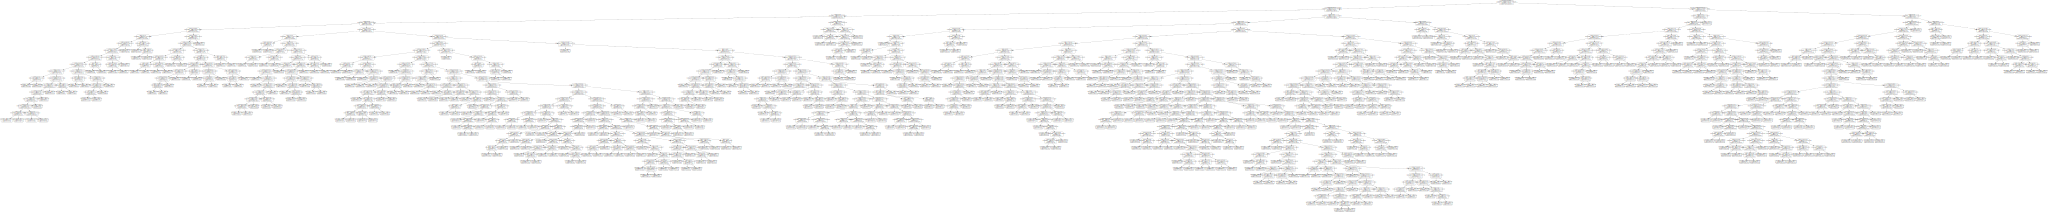

In [70]:
dot_data_DT = export_graphviz(decision_tree=model_Dt, rounded=True)
graph_DT = graphviz.Source(dot_data_DT, format="png")
graph_DT

In [71]:
## DT png 파일로 저장
graph_DT.render("cars_decision_tree_DT", format="png")

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.800308 to fit


'cars_decision_tree_DT.png'